# Endemo - Useful Energy Demand Model

## Create Input Manager

Reading Input ...
Input was successfully read.
Preprocessing Data ...
Preprocessing was successfully completed.
Creating instance filters...
Instance filters were successfully created.
Initiating model...
Model was successfully initiated.
Writing preprocessing output...


TypeError: 'float' object cannot be interpreted as an integer

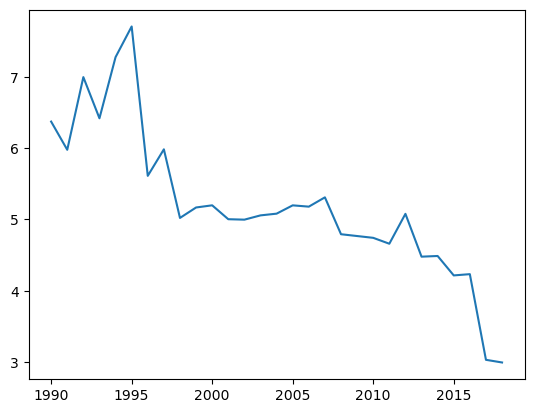

In [1]:
from endemo2 import endemo
import warnings
import numpy as np

warnings.simplefilter('ignore', np.RankWarning)
warnings.simplefilter('ignore', UserWarning)

model_instance = endemo.Endemo()
model_instance.execute_with_preprocessing()


In [3]:
# instance 2
model_instance.execute_without_preprocessing()

Updating settings for new scenario...


AttributeError: 'NoneType' object has no attribute 'update_set_and_control_parameters'

In [1]:
# instance 3
model_instance.execute_without_preprocessing()

(1999.0, 2001.0)

### Check if settings were read correctly

In [ ]:
# general settings
gs = model_instance.input_manager.ctrl.general_settings
print("Forecast year: " + str(gs.target_year))
print("Active sectors: " + str(gs.get_active_sectors()))
# print("Population Forecast: " + input_manager.ctrl.general_settings.population_forecast)
#print("Timeseries Forecast: " + ...)
# nuts ...
# world
# nuts2 classification
# graphical output
# calculate final energy demand

In [ ]:
print("Active Countries: \n" + str(gs.active_countries))

In [ ]:
# industry settings
inds = model_instance.input_manager.ctrl.industry_settings
print("Forecast method: " + str(inds.forecast_method))
# print("Timetrendmodel for u-shape")
print("Calculated per capita: " + str(inds.production_quantity_calc_per_capita))
print("Calc Specific Energy Requirements: " + str(inds.trend_calc_for_spec))
print("H2 subst of heat: " + str(inds.h2_subst_of_heat))
# print(nuts2...)
print("Skip years: " + str(inds.skip_years))
print("Last available year (excluding): " + str(inds.last_available_year))

## Test Utility functions
### Test Regression

In [ ]:
import endemo2.utility as uty

# Test Linear Regression

x = [2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011]
y = [1258.809906,1259.17278,1259.17278,1111.120188,1063.946568,1124.9094,1100.233968,1100.233968,1095.153732]
data = list(zip(x, y))

uty.linear_regression(data, visualize=True)

# Test Quadratic Regression

x = [6, 9, 12, 12, 15, 21, 24, 24, 27, 30, 36, 39, 45, 48, 57, 60]
y = [12, 18, 30, 42, 48, 78, 90, 96, 96, 90, 84, 78, 66, 54, 36, 24]
data = list(zip(x, y))

uty.quadratic_regression(data, visualize=True)


### Test filter out NaN and Inf

In [ ]:
import numpy as np
import math
import endemo2.utility as uty

x = [6, 9, 12, 12, 15, 21, 24, 24, 27, 30, 36, 39, 45, 48, 57, 60]
y = [12, np.NaN, np.inf, 42, 48, 78, 90, 96, 96, 90, 84, 78, 66, 54, 36, 24]
data = list(zip(x, y))

uty.filter_out_nan_and_inf(data)

### Combining Data on the x axis

Attention! If the x axis is ascending for both data arrays, use ascending_x=True for better performance!

In [ ]:
import endemo2.utility as uty

a = [(1, 100), (2, 200), (3, 300), (4, 400), (5, 500)]
b = [(2, 2000), (3, 3000), (5, 5000)]

print(uty.combine_data_on_x(a, b, ascending_x=True))

a = [(1, 100), (2, 200), (3, 300), (4, 400), (5, 500)]
b = [(3, 3000),(2, 2000),  (5, 5000)]

print(uty.combine_data_on_x(a, b))


### Zip on X explained

In [ ]:
import endemo2.utility as uty

a = [(1, 100), (2, 200), (3, 300), (4, 400), (5, 500)]
b = [(2, 2000), (3, 3000), (5, 5000)]

print(list(uty.zip_on_x(a, b)))

In [ ]:
import endemo2.utility as uty

amount = [(1998, 10), (2001, 12), (2003, 11), (2006, 13)]
population = [(2000, 10000), (2001, 11000), (2002, 12000), (2003, 13000), (2004, 14000), (2005, 14000), (2006, 15000)]
gdp = [(2000, 20), (2001, 30), (2002, 20), (2003, 30), (2004, 40), (2005, 50), (2006, 60)]

zip_amount_pop = list(uty.zip_on_x(amount, population))

print("zipped amount & population: " + str(zip_amount_pop))
print("Transformed amount to per capita: " + str(list(map(lambda arg: (arg[0][0], arg[0][1] / arg[1][1]), zip_amount_pop))))

In [ ]:
import endemo2.utility as uty

x = [(2000, 20), (2001, 30), (2002, 20), (2003, 30), (2004, 40), (2005, 50), (2006, 60)]
uty.cut_after_x(x, 2002)


In [ ]:
x[:len(x)-1]

In [ ]:
from endemo2.data_structures.containers import Demand, Heat
d0:Demand = Demand()
print(str(d0))
d1 = Demand(1, Heat(1, 1, 1, 1), 1)
print(str(d1))
d2 = Demand(1, Heat(1, 1, 1, 1), 1)
print(str(d2))
d3 = Demand(1, Heat(1, 1, 1, 1), 1)
print(str(d3))
d0.add(d1)
d0.add(d2)
d0.add(d3)
print(str(d0))

